# Imports & globals

In [1]:
import sys
sys.path.append("/home/cbarkhof/fall-2021")

In [2]:
from analysis_run_postprocessing.general_postprocessing_steps import *

%config InlineBackend.figure_format='retina'
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

DEVICE = "cuda:0"
EXPORT_DIR = f"{CODE_DIR}/analysis_run_postprocessing/run_postprocess_files"
SAMPLE_FILE = f"generative-samples.pt"
CONDITIONAL_SAMPLE_FILE = f"generative-conditional-samples.pt"

# Fetch relevant runs

In [3]:
prefixes = ["(mdr-vae-exp 8 oct)", "(fb-vae-exp 8 oct) ", 
            "(beta-vae-exp 6 oct) ", "(inf-vae-exp 5 oct) ", 
            "(5-jan ptb-test)", "(4-jan ptb-test)"]

run_df = make_run_overview_df(prefixes)
run_df

,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 1 l_MMD 10 dec: Weak-M roBERTa,INFO-VAE,1,ptb,language,0,0,0,10,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=1.0, l_2_mm..."
...,...,...,...,...,...,...,...,...,...,...
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,INFO-VAE,100,bmnist,image,0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,INFO-VAE,1000,bmnist,image,0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1000.0, ..."
INFO-VAE l_Rate 100 l_MMD 1000 dec: PixelCNN++,INFO-VAE,100,bmnist,image,0,0,0,1000,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1 l_MMD 1000 dec: CNN.T,INFO-VAE,1,bmnist,image,0,0,0,1000,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1.0, l_2..."


# Check whether there are samples missing

In [7]:
missing_df = overview_of_missing_analysis(run_df)
missing_df.sum()

dir                0
surprisal_data     0
encode             0
samples           49
cond_samples      50
evaluation         0
dtype: int64

In [9]:
missing_df = run_df.join(missing_df, on="run_name")

# Gather all the samples & number of samples

In [12]:
all_samples, all_lengths = dict(), dict()

for idx, row in missing_df[(missing_df.cond_samples == False) & (missing_df.samples == False)].iterrows():
    # print(idx)
    
    save_dir = f"{EXPORT_DIR}/{row.run_name}"
    sample_file = f"{save_dir}/{SAMPLE_FILE}"
    cond_sample_file = f"{save_dir}/{CONDITIONAL_SAMPLE_FILE}"
    
    samples = torch.load(sample_file)
    cond_samples = torch.load(cond_sample_file)
    
    phase = "valid"
    
    if row.image_or_language == "language":
        
        d = {
            "condition_attention_mask": cond_samples[phase]["original_attention_mask"],
            "condition_x": cond_samples[phase]["original_input_ids"],
            "condition_text": cond_samples[phase]["original_input_text"],
            "conditional_sample_x": cond_samples[phase]["cond_sample_x"],
            "conditional_sample_text": cond_samples[phase]["condtional_sample_text"],
            "unconditional_sample_x": samples["x"],
            "unconditional_sample_text": samples["text"],
            "image_or_language": "language"
        }
            
    else:
        
        d = {
            "condition_x": cond_samples[phase]["original_x"],
            "conditional_sample_x": cond_samples[phase]["cond_sample_x"],
            "condition_y": cond_samples[phase]["original_y"],
            "unconditional_sample_x": samples["x"],
            "image_or_language": "image"
        }
        
    len_d = {k :len(v) if k != "image_or_language" else v for k, v in d.items()}
     
    all_samples[idx] = d
    all_lengths[idx] = len_d

I0110 13:59:35.425106 22401555865344 utils.py:145] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
I0110 13:59:35.426917 22401555865344 utils.py:157] NumExpr defaulting to 8 threads.


In [13]:
df = pd.DataFrame(all_lengths).transpose()
df[df.image_or_language == "language"][["unconditional_sample_x", "conditional_sample_x", "condition_x"]]

,unconditional_sample_x,conditional_sample_x,condition_x
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,2000,2560,2560
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,2000,2560,2560
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Weak-M roBERTa,2000,2560,2560
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Strong roBERTa,2000,2560,2560
INFO-VAE l_Rate 1 l_MMD 10 dec: Weak-M roBERTa,2000,2560,2560
INFO-VAE l_Rate 1 l_MMD 1 dec: Weak-M roBERTa,2000,2560,2560
INFO-VAE l_Rate 0.1 l_MMD 10 dec: Weak-M roBERTa,2000,2560,2560
INFO-VAE l_Rate 0.1 l_MMD 1 dec: Weak-M roBERTa,2000,2560,2560
INFO-VAE l_Rate 0.1 l_MMD 10 dec: Strong roBERTa,2000,2560,2560
INFO-VAE l_Rate 0.1 l_MMD 1 dec: Strong roBERTa,2000,2560,2560


# Print some text samples

In [36]:
# for idx, samples in all_samples.items():
    
#     if ("weak" in idx.lower()) or ("strong" in idx.lower()):
#         print(idx)
        
#         for i in range(2):
#             print("CONDITION")
#             print("\tcondition_x", len(samples["condition_x"][i].tolist()), samples["condition_x"][i].tolist())
#             print("\tcondition_text", samples["condition_text"][i])
#             print()
#             print("CONDITIONAL SAMPLE")
#             print("\tconditional_sample_x", len(samples["conditional_sample_x"][i].tolist()), samples["conditional_sample_x"][i].tolist())
#             print("\tconditional_sample_text", samples["conditional_sample_text"][i])
#             print()
#             print("SAMPLE")
#             print("\tunconditional_sample_x", len(samples["unconditional_sample_x"][i].tolist()), samples["unconditional_sample_x"][i].tolist())
#             print("\tunconditional_sample_text", samples["unconditional_sample_text"][i])
            
#         print("-"*60)
#         print()

INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa
CONDITION
	condition_x 64 [0, 627, 10170, 61, 4865, 68, 234, 325, 9, 162, 1178, 2684, 128, 29, 4761, 8, 251, 12, 1279, 1126, 16, 421, 7, 213, 88, 1683, 11, 419, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
	condition_text <s>the accord which covers $ N billion of mexico's medium and long-term debt is expected to go into effect in early

CONDITIONAL SAMPLE
	conditional_sample_x 64 [0, 627, 696, 21, 1280, 513, 234, 5157, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
	conditional_sample_text <s>the issue was amount least N securities

SAMPLE
	unconditional_sample_x 64 [0, 12465, 14035, 6814, 2476, 425, 4975, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

MDR-VAE 40 dec: PixelCNN++


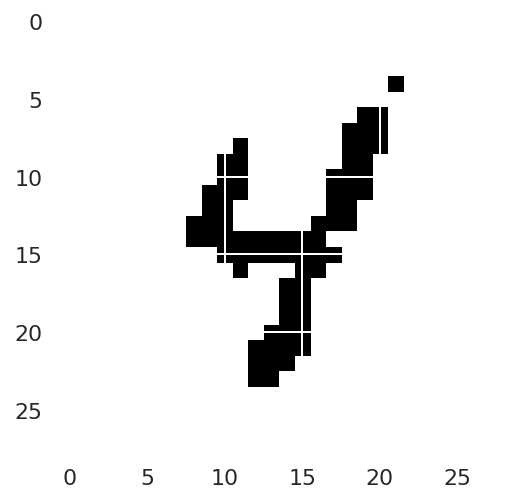

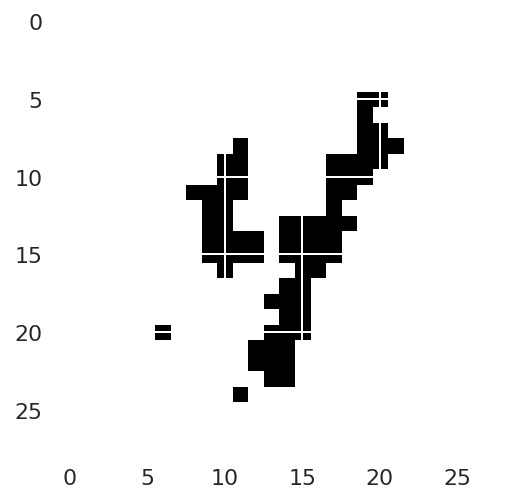

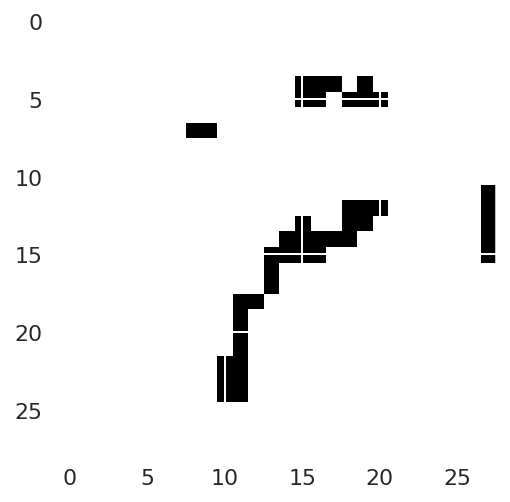

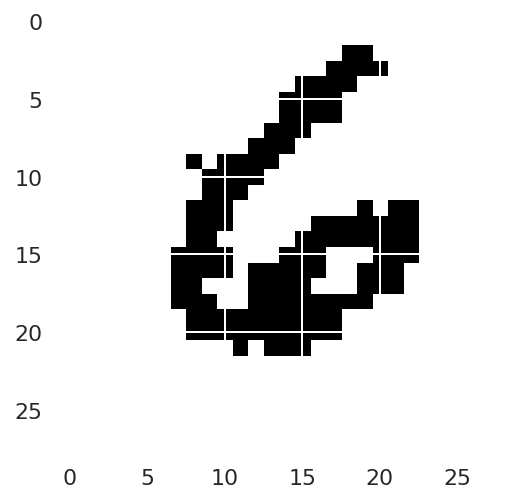

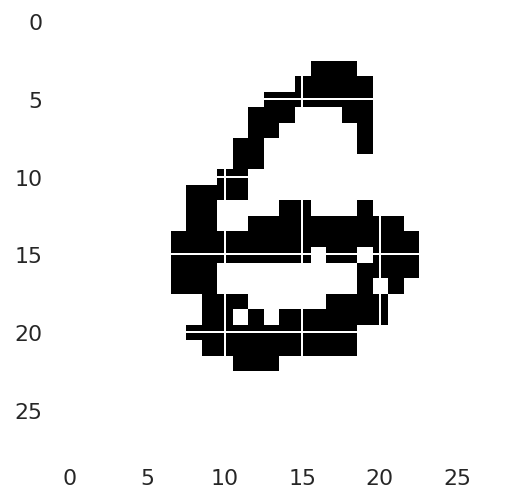

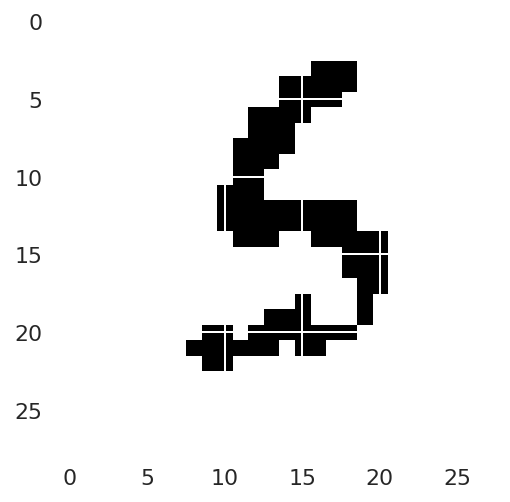

MDR-VAE 32 dec: PixelCNN++


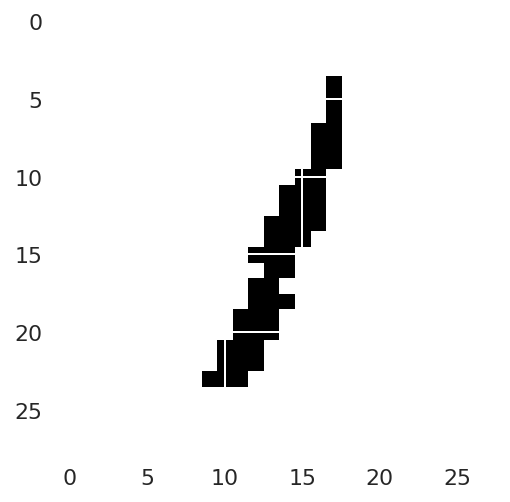

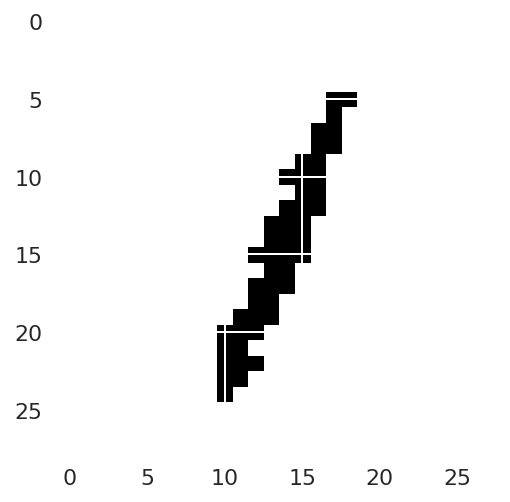

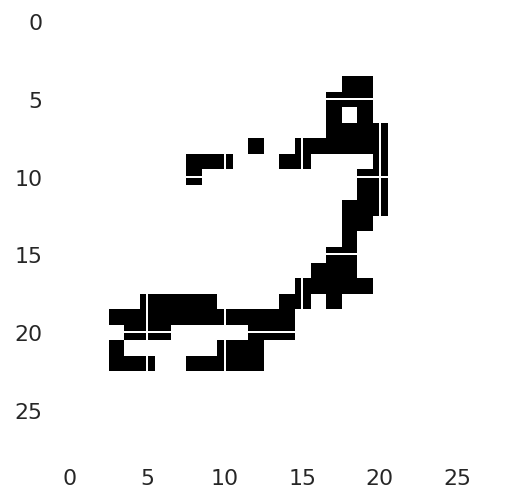

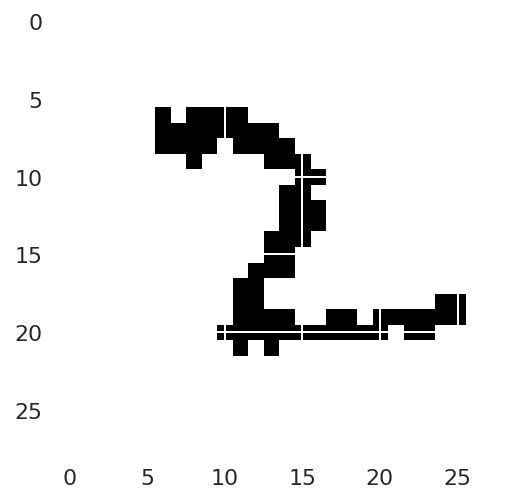

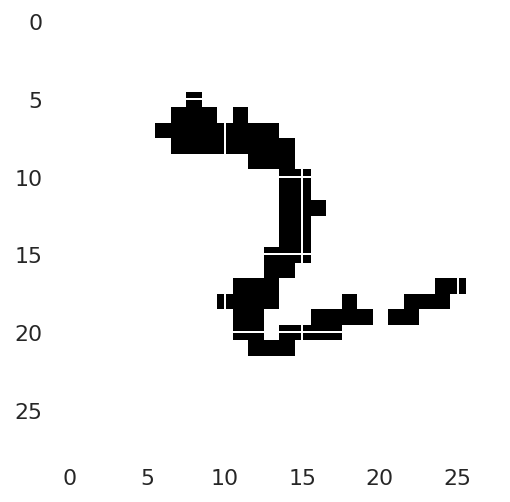

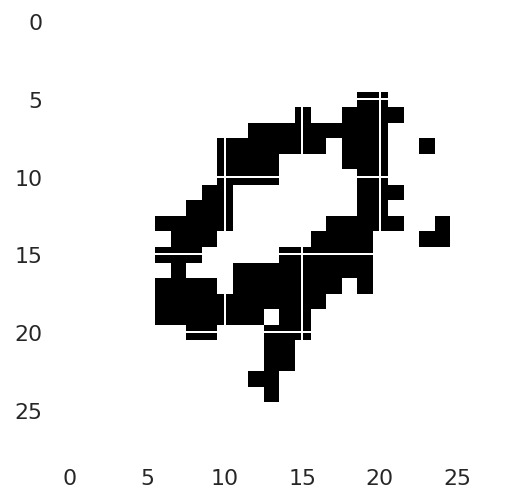

MDR-VAE 24 dec: PixelCNN++


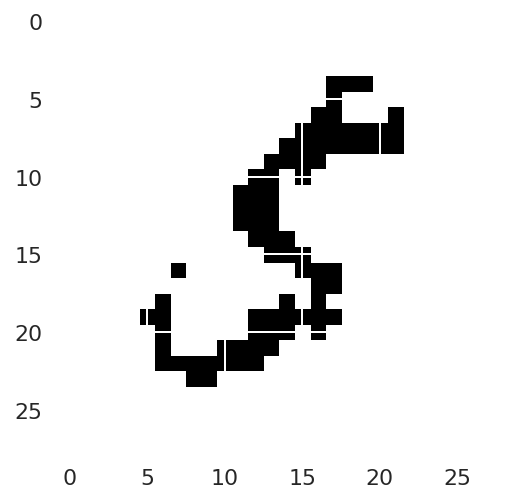

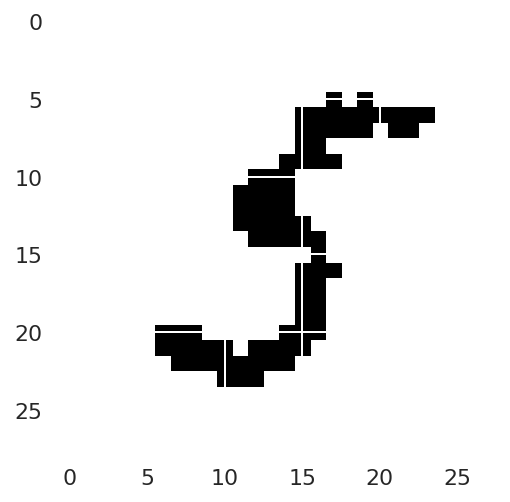

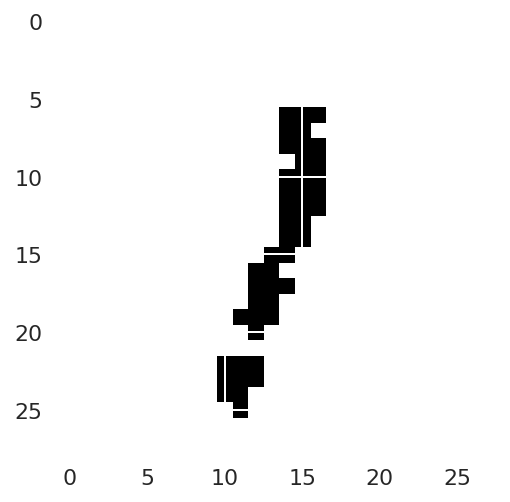

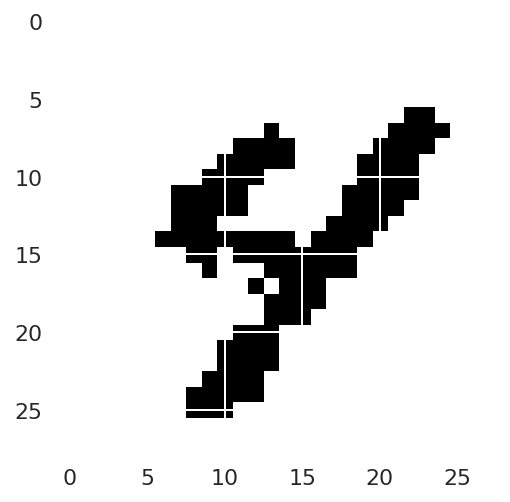

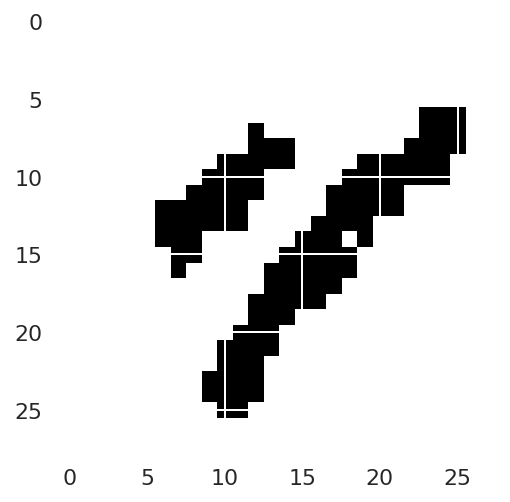

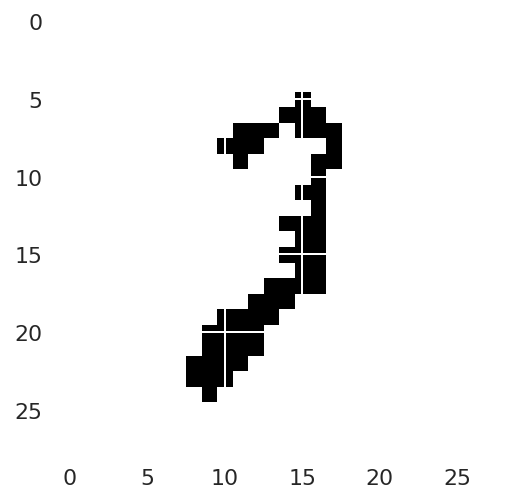

MDR-VAE 16 dec: PixelCNN++


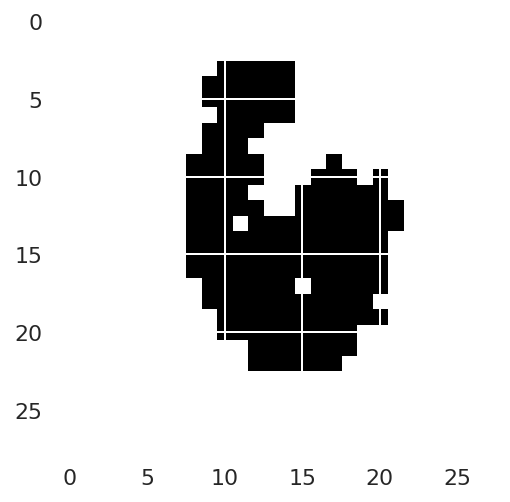

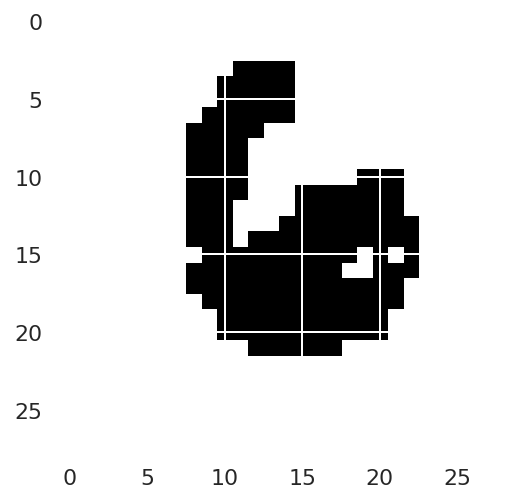

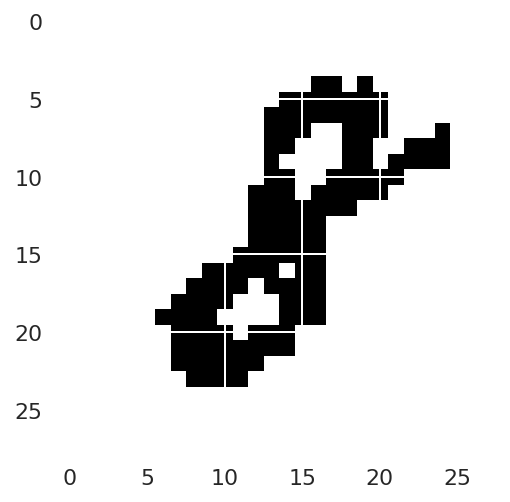

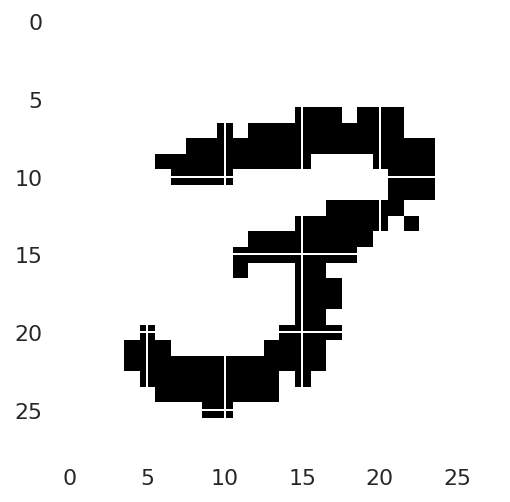

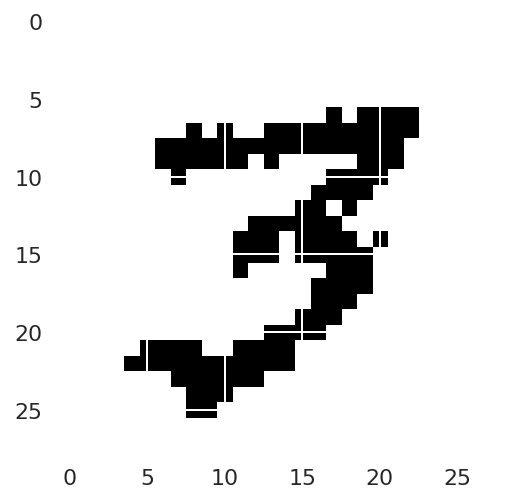

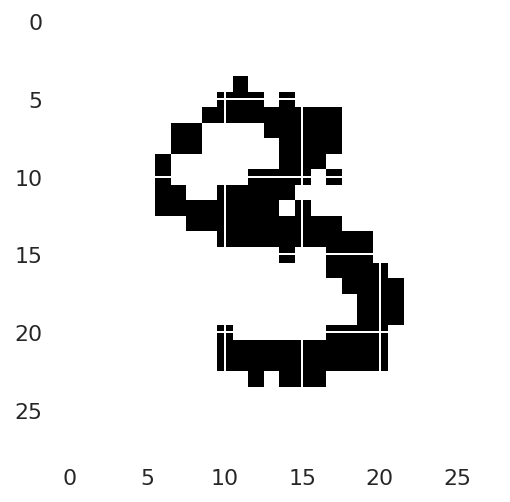

MDR-VAE 8 dec: PixelCNN++


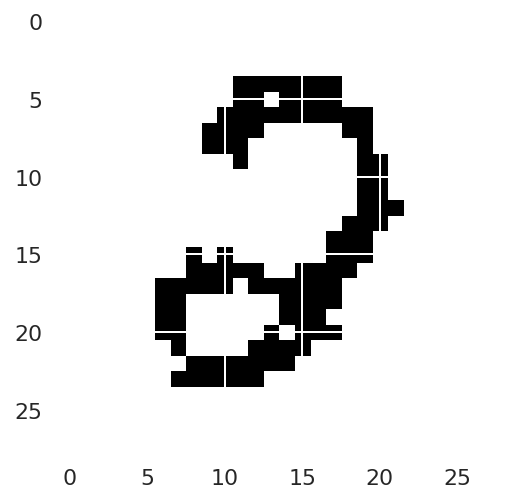

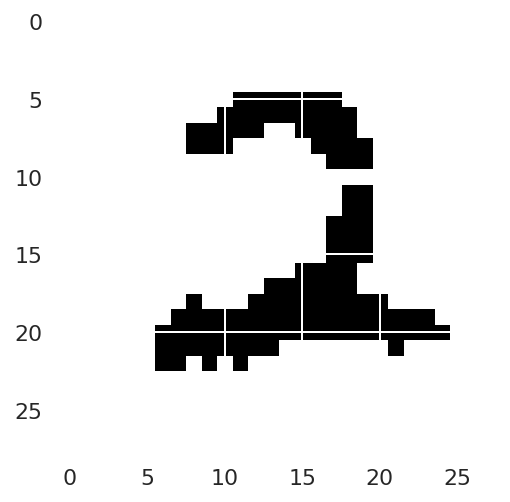

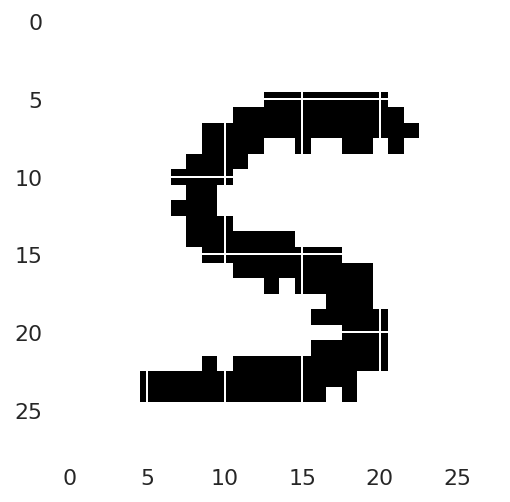

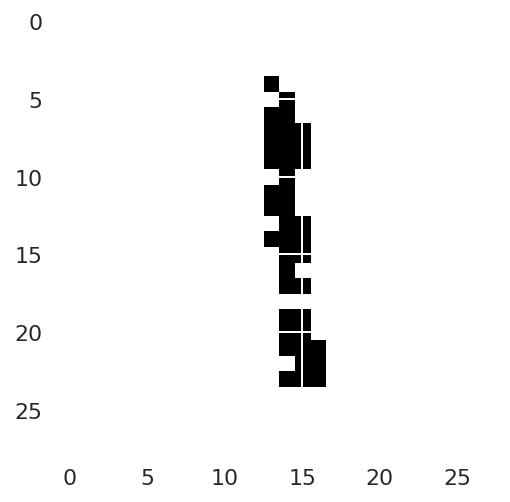

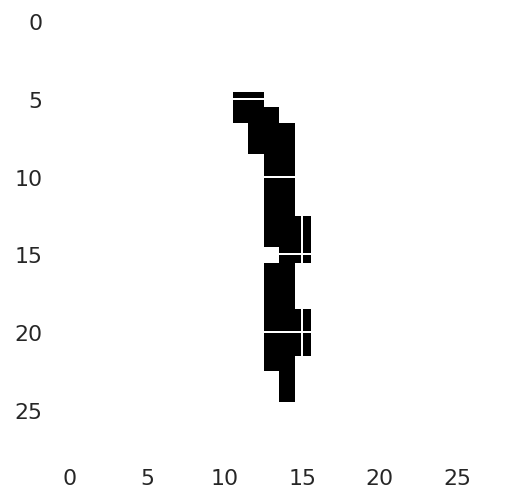

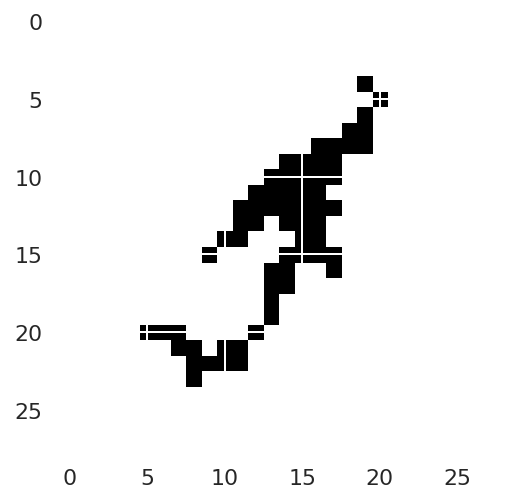

MDR-VAE 4 dec: PixelCNN++


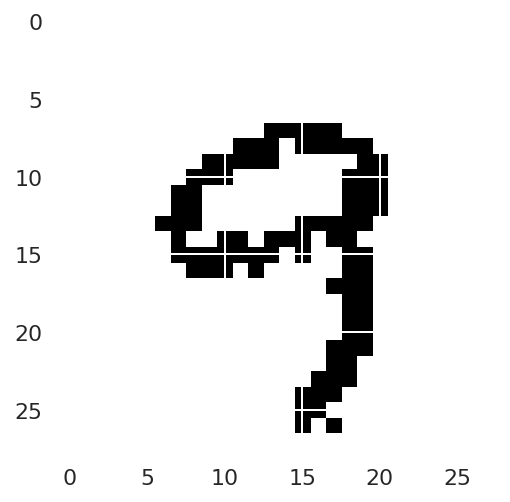

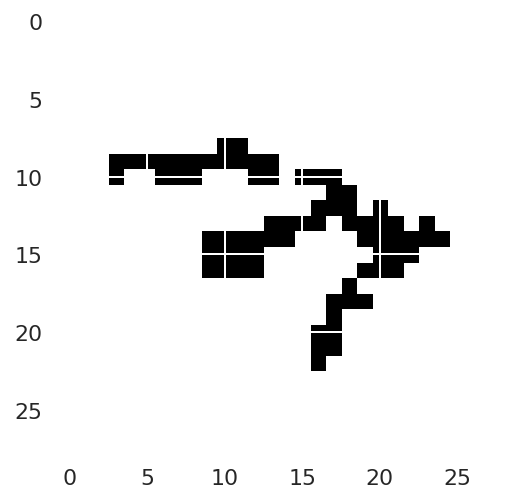

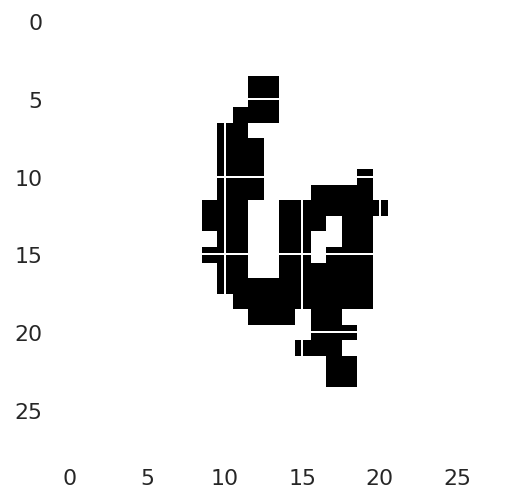

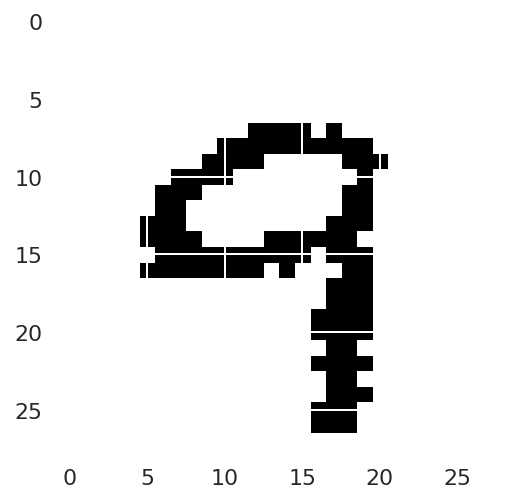

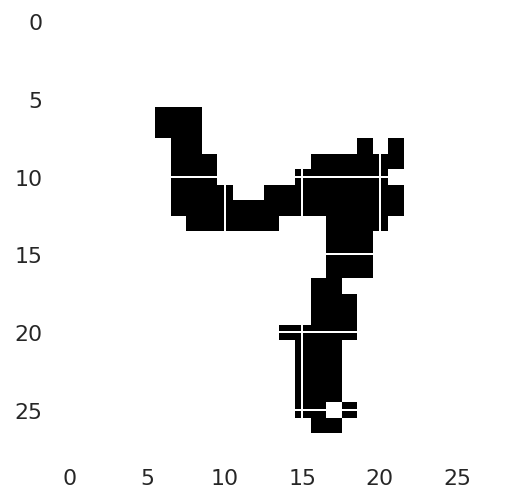

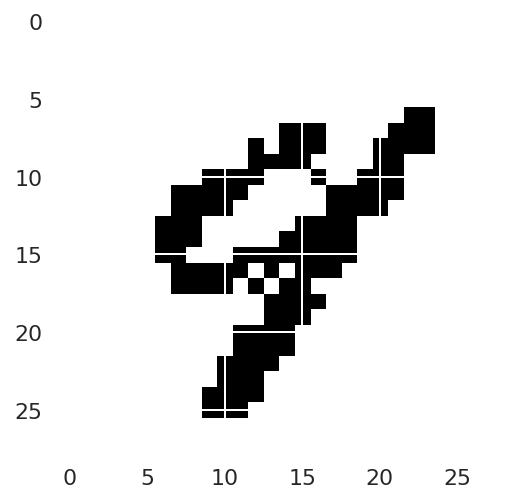

FB-VAE 40 dec: PixelCNN++


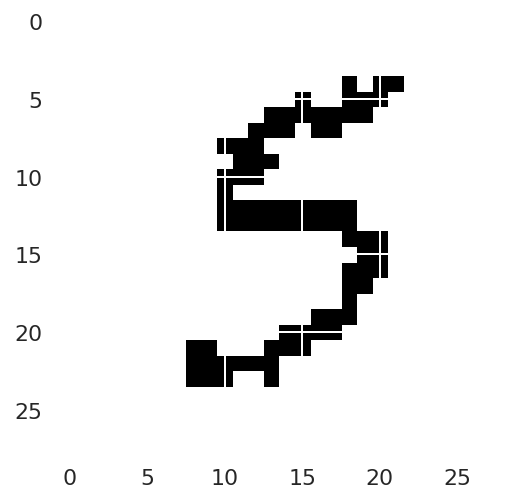

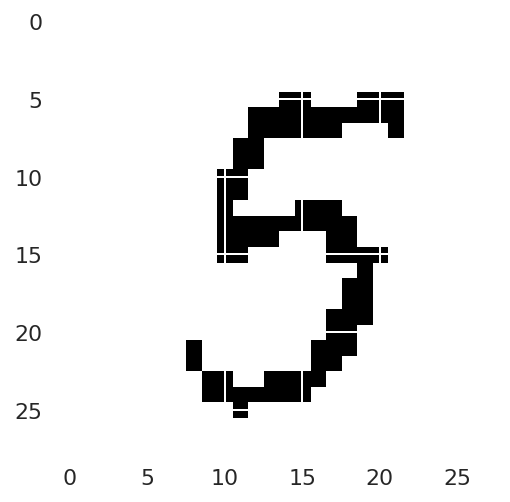

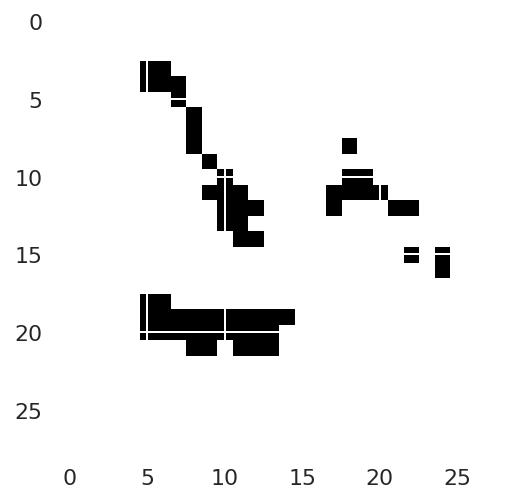

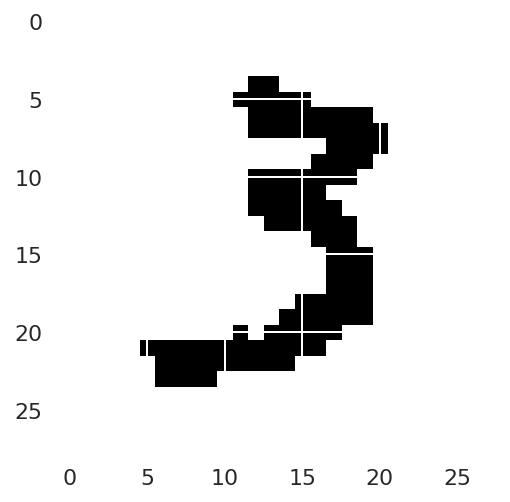

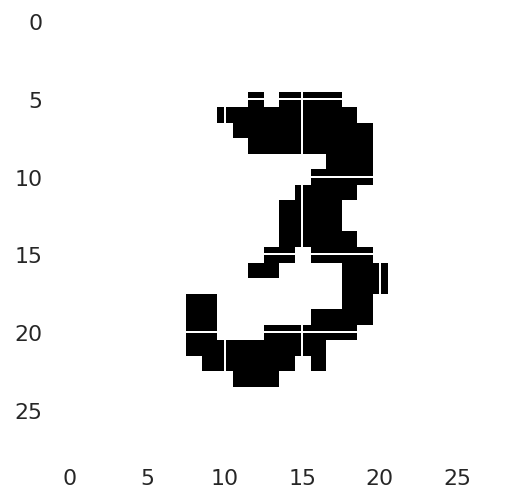

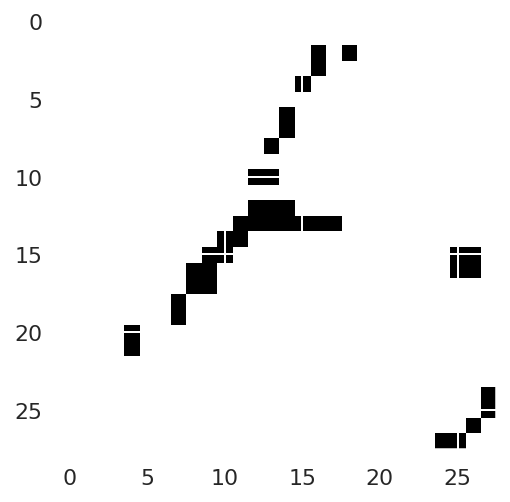

FB-VAE 32 dec: PixelCNN++


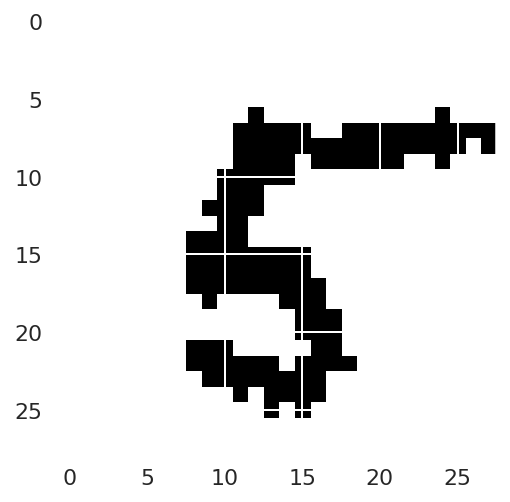

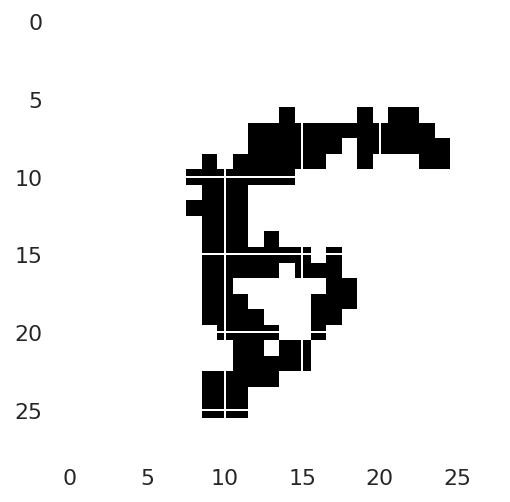

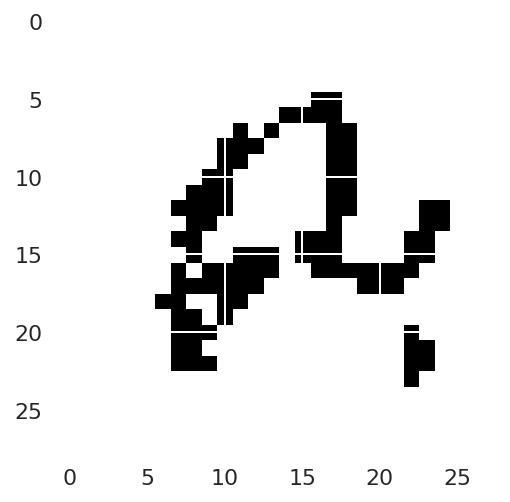

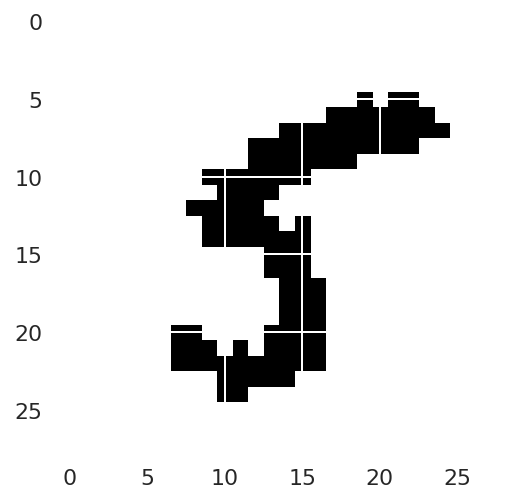

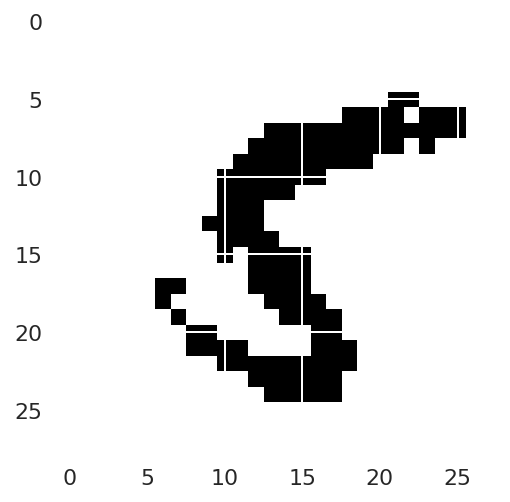

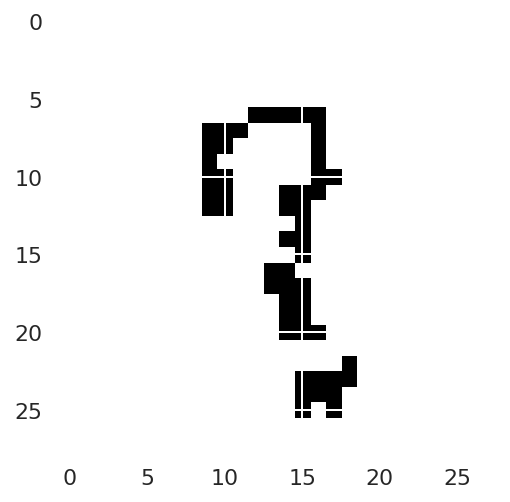

FB-VAE 24 dec: PixelCNN++


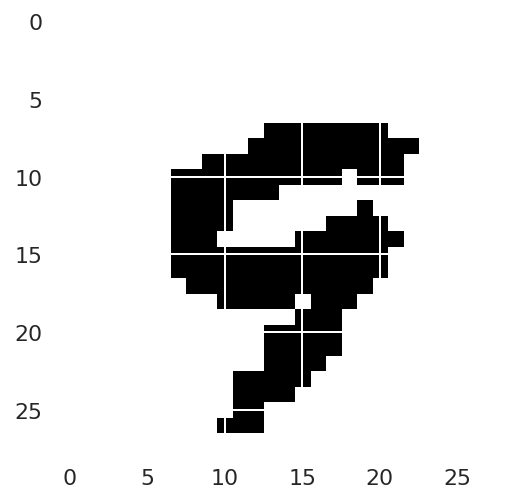

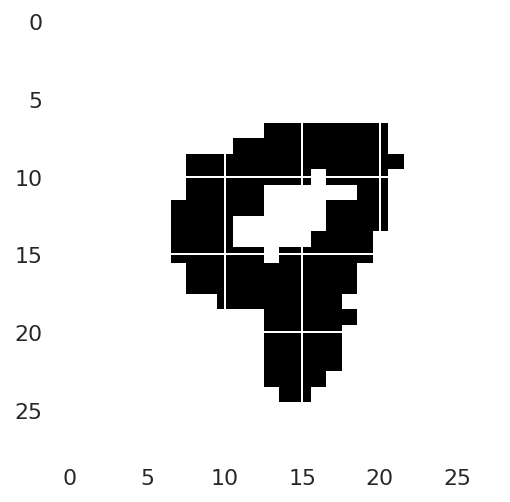

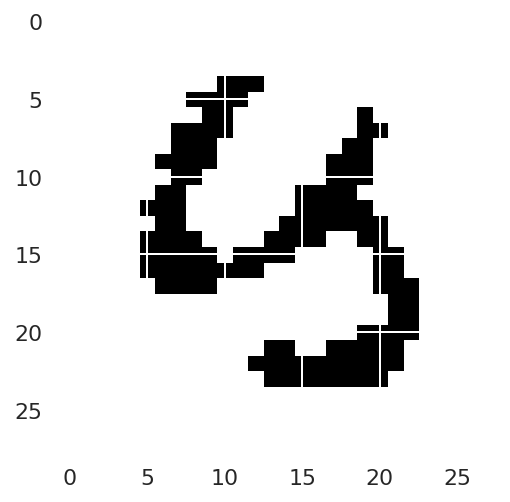

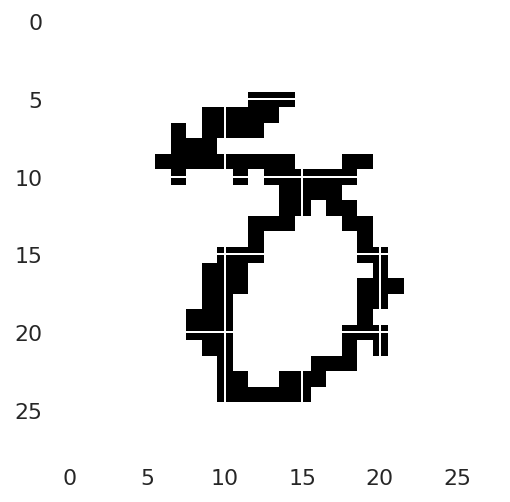

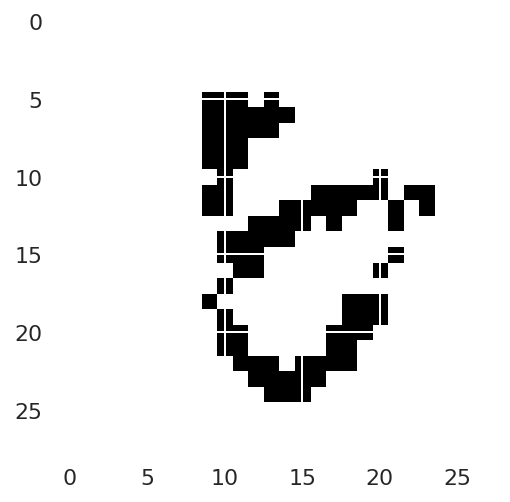

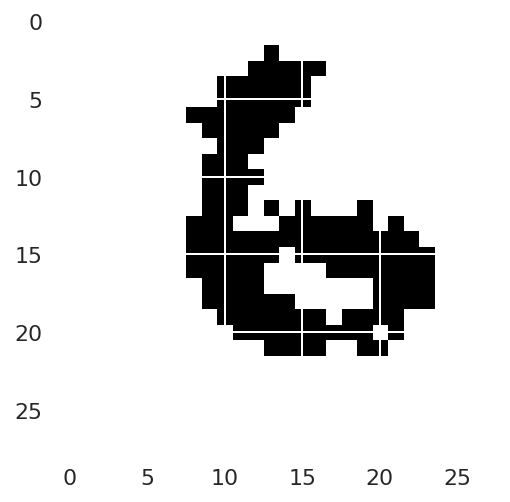

FB-VAE 8 dec: PixelCNN++


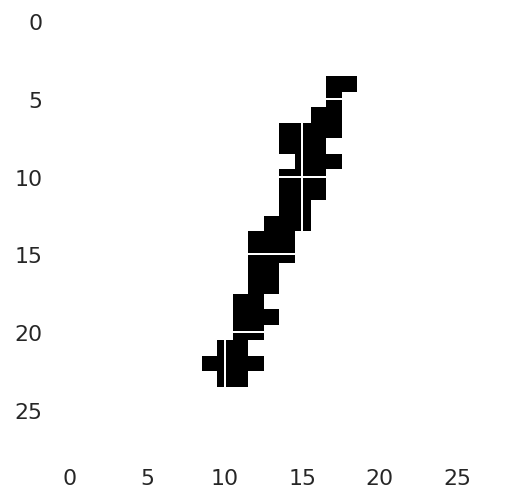

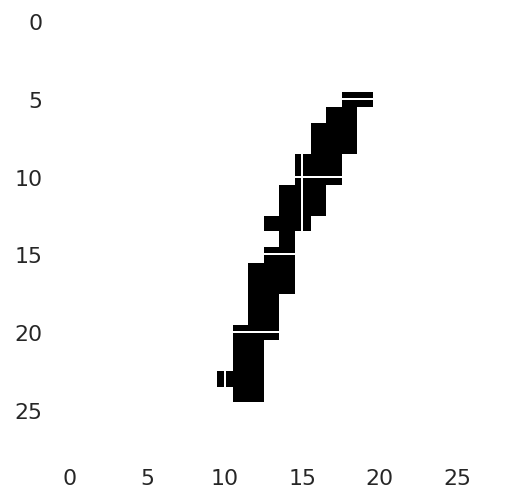

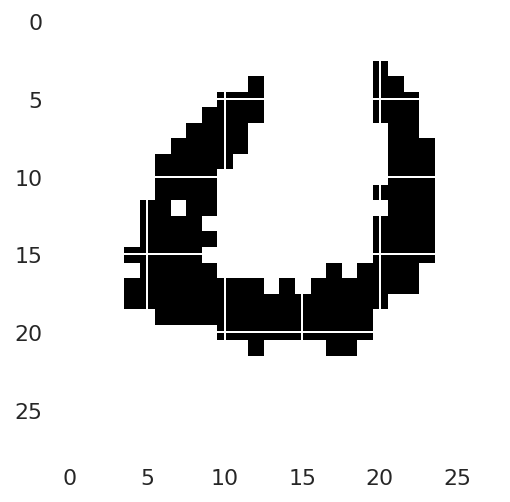

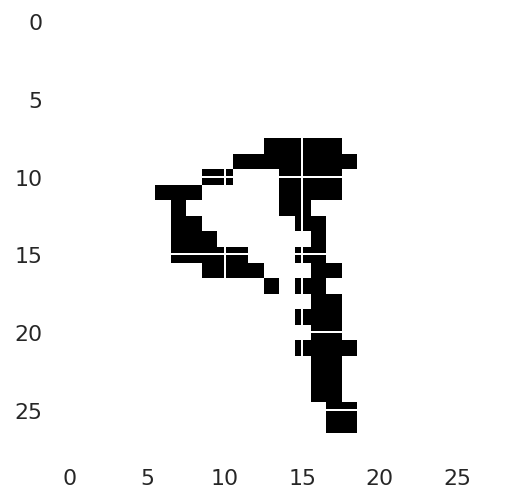

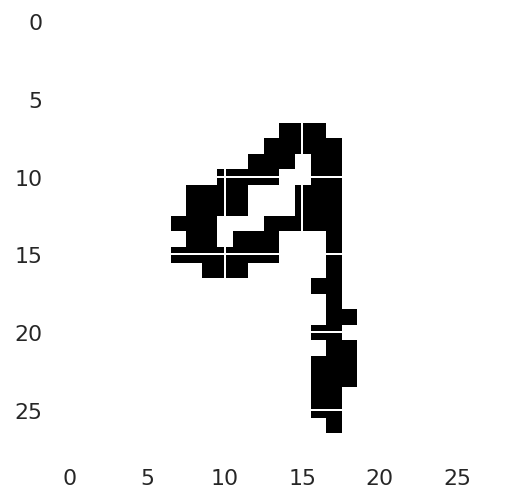

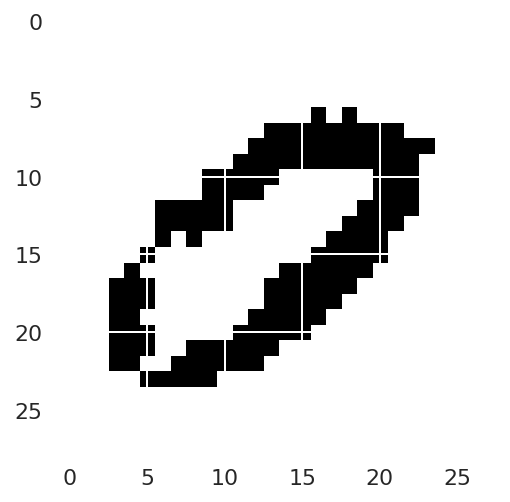

FB-VAE 4 dec: PixelCNN++


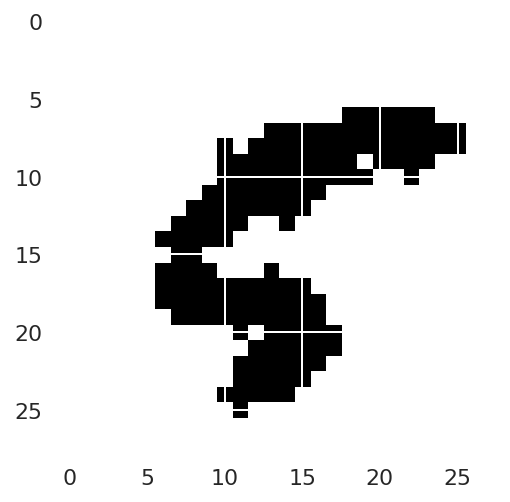

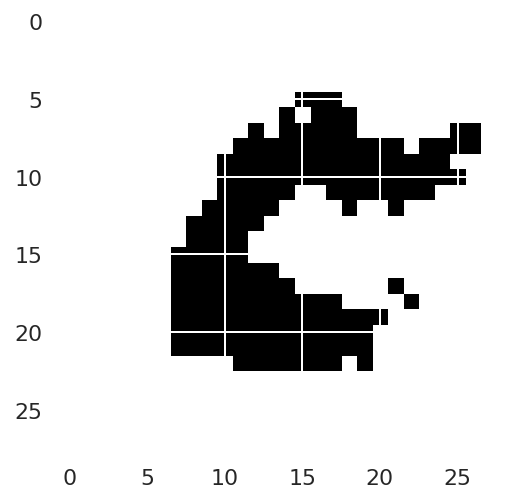

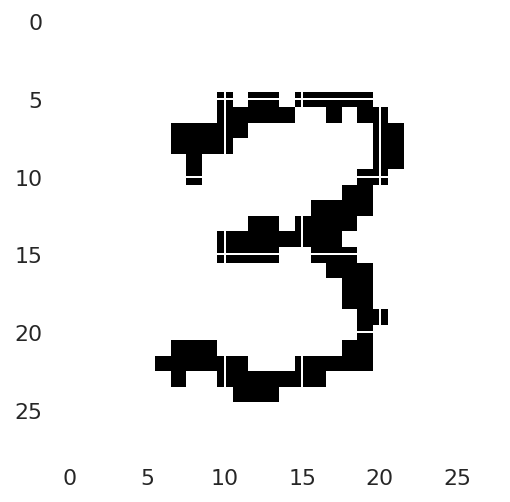

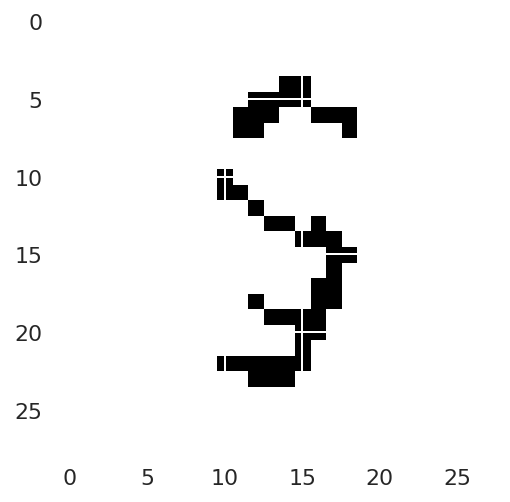

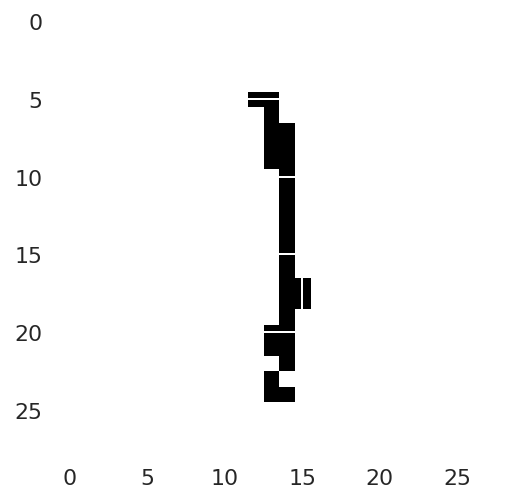

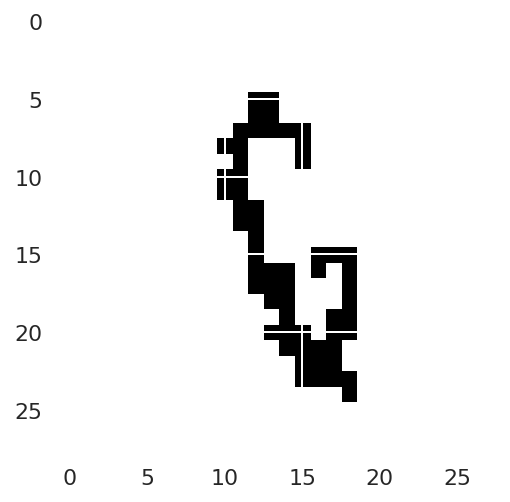

FB-VAE 16 dec: PixelCNN++


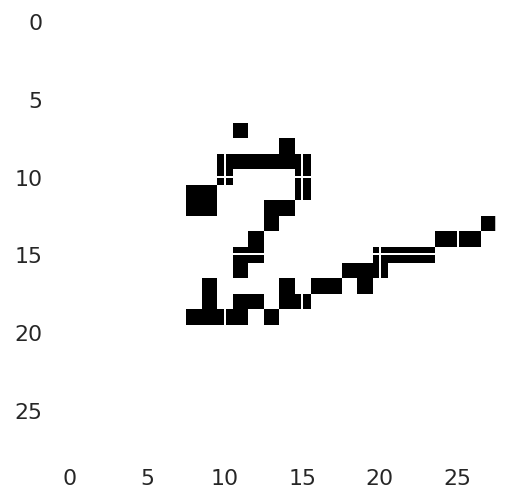

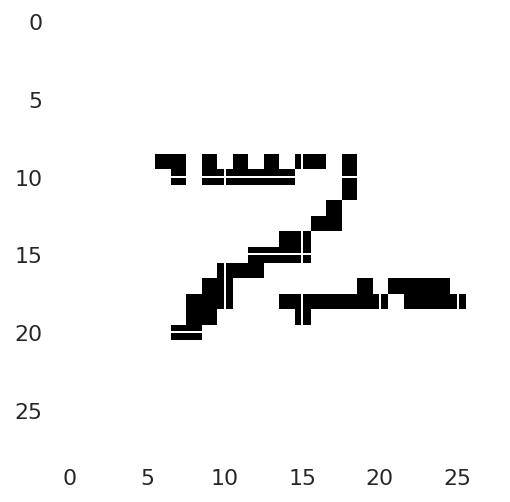

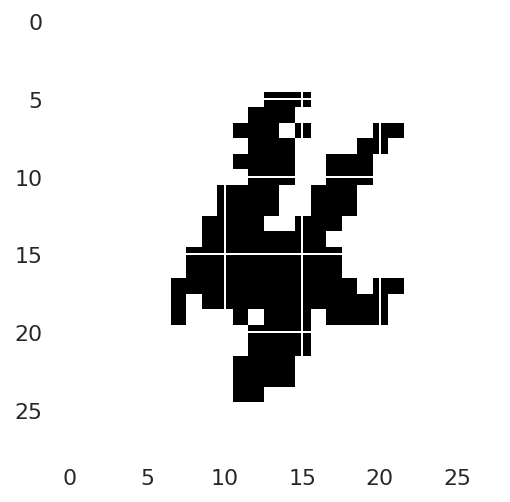

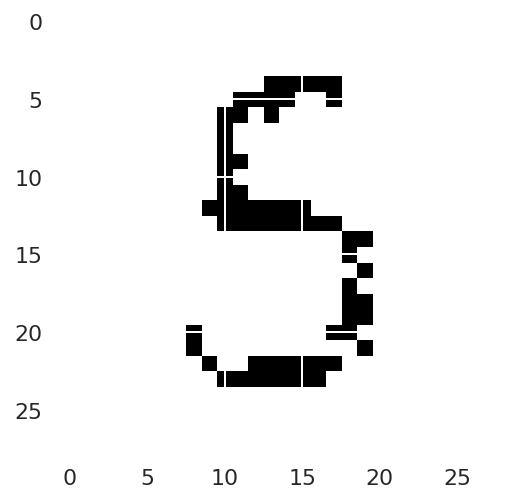

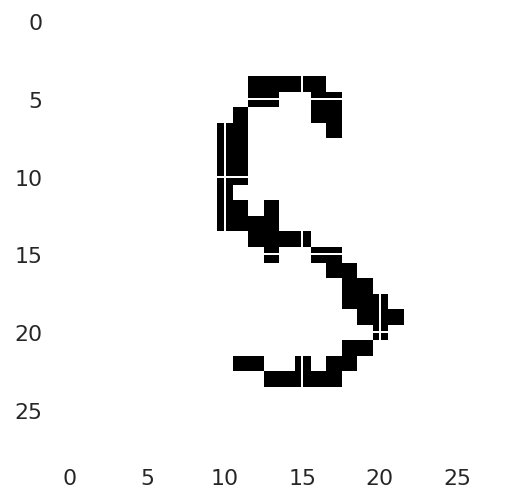

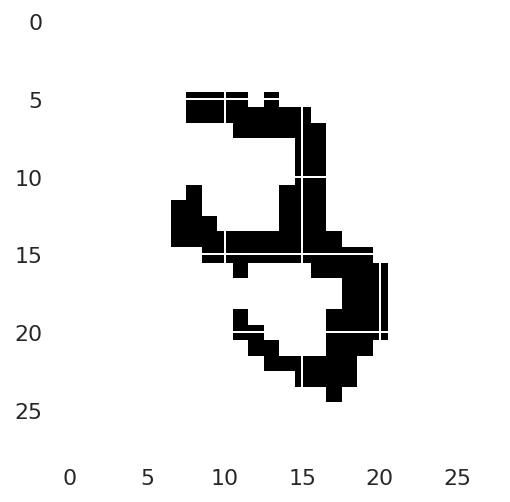

In [31]:
for idx, samples in all_samples.items():
    
    if "pixel" in idx.lower():
        print(idx)
        
        for i in range(2):
        
            plt.imshow(samples["condition_x"][i][0].numpy(), cmap="Greys")
            plt.show()

            plt.imshow(samples["conditional_sample_x"][i][0].numpy(), cmap="Greys")
            plt.show()

            plt.imshow(samples["unconditional_sample_x"][i][0].numpy(), cmap="Greys")
            plt.show()



# Merge with the hyper parameters

In [7]:
results_df['hyper params'] = results_df.index.map(run_df.transpose().to_dict())
results_df = pd.concat([results_df, results_df['hyper params'].apply(pd.Series)], axis=1)
results_df.head()

,phase,IW LL,MMD,PPL,distortion,elbo,kl_prior_post,mean_mean,mean_scale,std_across_x_mean,...,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,test,-153.543872,0.000122,0.002958,136.444890,-158.265181,21.820290,0.003869,0.758269,0.356910,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,valid,-152.013220,0.000155,0.003122,136.068936,-157.951697,21.882761,0.020147,0.758552,0.348643,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,train,NaN,0.000098,NaN,131.047330,-153.131761,22.084430,-0.005843,0.756893,0.354952,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,test,-99.954301,0.000349,0.023003,76.031745,-104.032034,28.000288,-0.006067,0.614176,0.632770,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,valid,-99.529459,0.000370,0.022468,77.500460,-105.342155,27.841694,-0.013231,0.613299,0.623523,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."


# Columns present to plot

In [8]:
for i, c in enumerate(results_df.columns):
    print(i, c)

0 phase
1 IW LL
2 MMD
3 PPL
4 distortion
5 elbo
6 kl_prior_post
7 mean_mean
8 mean_scale
9 std_across_x_mean
10 std_across_x_scale
11 std_across_z_mean
12 std_across_z_scale
13 hyper params
14 objective
15 l_rate
16 dataset
17 image_or_language
18 beta_beta
19 free_bits
20 mdr_value
21 l_mmd
22 decoder
23 run_name


# Plots

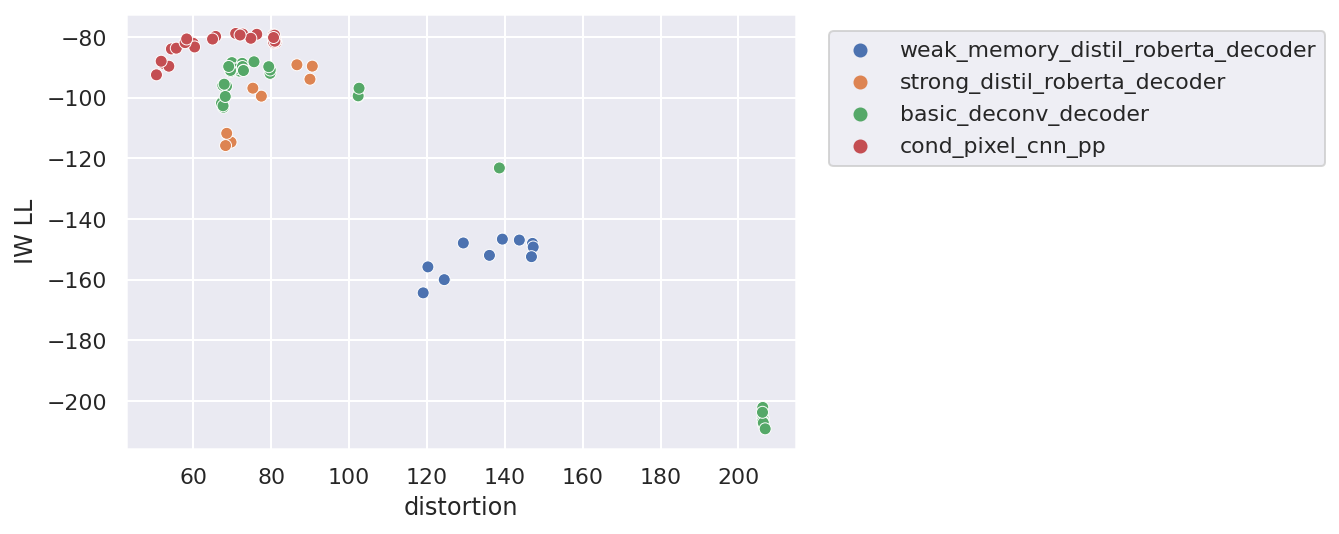

In [9]:
data = results_df[results_df.phase == "valid"]

sns.scatterplot(
    x="distortion", 
    y="IW LL", 
    hue="decoder", 
    data=data) 

plt.legend(loc=(1.05, 0.65))

<AxesSubplot:xlabel='l_mmd', ylabel='MMD'>

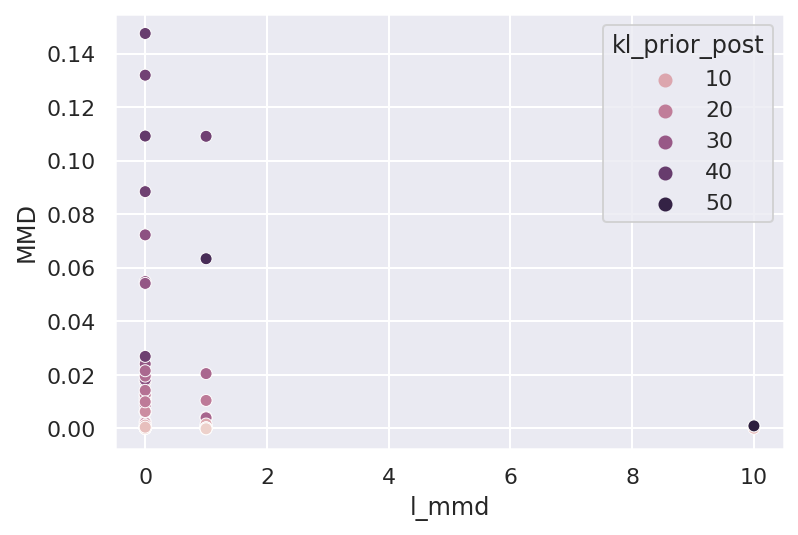

In [16]:
data = results_df[(results_df.phase == "valid") & (results_df.l_mmd < 100)]

sns.scatterplot(
    x="l_mmd", 
    y="MMD", 
    hue="kl_prior_post", 
    data=data) 